In [1]:
import os
import pickle

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from funes.tgan.metrics.visualization import visualization
import argparse
import math
from numpy import fft

%matplotlib inline

50epoch 10 batch 10hidden 2layers ,embedding 7min,supervised 4mins,joint 1h

## PCA and t-SNE visualization

In [ ]:
torch.cuda.empty_cache()
! ./run.sh



In [ ]:
name = "SOC"
epoch = 1000
batchsize = 64
hidden = 128
layers = 4
learning_rate = 1e-3
seq_len= 370
sample_size = 4000

path = (
    "output/"
    + "SOC"
    + "-"
    + str(epoch)
    + "-"
    + str(batchsize)
    + "-"
    + str(hidden)
    + "-"
    + str(layers)
    + "-"
    + str(learning_rate)
    + "-"
    + str(seq_len)
    + "-"
    + str(sample_size)
)

with open(f"{path}/train_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)
with open(f"{path}/fake_data.pickle", "rb") as fb:
    new_data = pickle.load(fb)

print(ori_data.shape)
print(new_data.shape)

In [2]:
with open(f"{path}/warn_data.pickle", "rb") as fb:
    ori_data = pickle.load(fb)
ori_data.shape

(396, 370, 3)

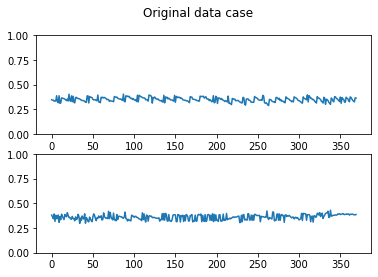

<Figure size 432x288 with 0 Axes>

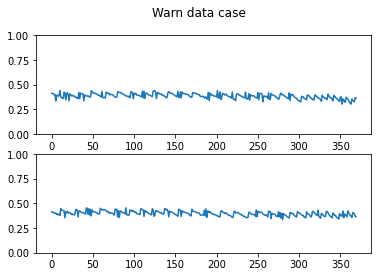

In [16]:
pic_num = 2
index = 0
index = index*pic_num

figure, ax = plt.subplots()
figure.suptitle('Original data case')
for i in range(1,pic_num+1):
    plt.subplot(2,1,i)
    plt.ylim([0,1])
    plt.plot(ori_data[i+index,:,1])

plt.figure()
figure, ax = plt.subplots()
figure.suptitle('Warn data case')
plt.subplot(2,1,1)
plt.ylim([0,1])
plt.plot(ori_data[388,:,1])
plt.subplot(2,1,2)
plt.ylim([0,1])
plt.plot(ori_data[389,:,1])
# plt.savefig(str(batchsize)+"-"+str(hidden)+"-"+str(layers)+"-ori.png")

In [ ]:
pic_num = 16
index = 0
index = index*pic_num

figure, ax = plt.subplots()
figure.suptitle('Original data case')
for i in range(1,pic_num+1):
    plt.subplot(4,4,i)
    plt.ylim([0.1,0.5])
    plt.plot(ori_data[i+index,:,1])

In [ ]:
from scipy.fftpack import fft
fft_new_data = fft(new_data)
fft_ori_data = fft(ori_data)

ori_data_all = np.array(fft_ori_data[:, :, 1])
figure, ax = plt.subplots()
figure.suptitle('FFT Most similar cases')
for j in range(1,pic_num+1):
    ori_data_case = ori_data_all[j+index]
    mae_list = []
    for i in range(ori_data_all.shape[0]):
        gen_data_case = np.array(fft_new_data[i,:,1])
        diff = np.mean(abs(ori_data_case - gen_data_case))
        mae_list.append(diff)
    plt.subplot(4,4,j)
    plt.ylim([0.1,0.5])
    plt.plot(new_data[mae_list.index(min(mae_list)),:,1])
plt.savefig(str(batchsize)+"-"+str(hidden)+"-"+str(layers)+"-gen.png")


    



Embedder output

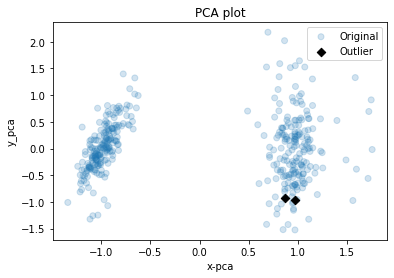

In [6]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca.fit(ori_data)
# pca_results = pca.transform(ori_data)
# pca_hat_results = pca.transform(new_data)
# anal_sample_no = len(ori_data)
# # Plotting
# colors = ["tab:blue" for i in range(anal_sample_no)] + [
#     "tab:orange" for i in range(anal_sample_no)
# ]
# f, ax = plt.subplots(1)
# plt.scatter(
#     pca_results[:, 0],
#     pca_results[:, 1],
#     c=colors[:anal_sample_no],
#     alpha=0.2,
#     label="Original",
# )
# plt.scatter(
#     pca_hat_results[:, 0],
#     pca_hat_results[:, 1],
#     c=colors[anal_sample_no:],
#     alpha=0.2,
#     label="Synthetic",
# )

# ax.legend()
# plt.title("PCA plot")
# plt.xlabel("x-pca")
# plt.ylabel("y_pca")
# plt.show()
out_list = [388,389]
visualization(ori_data,out_list=out_list,analysis="pca")

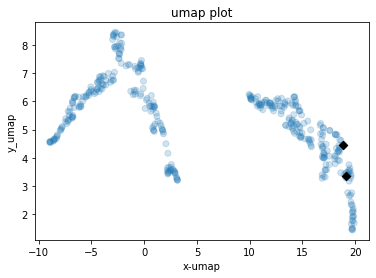

In [8]:
# from sklearn.manifold import TSNE
# prep_data_final = np.concatenate((ori_data, new_data), axis=0)
# # TSNE anlaysis
# tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# tsne_results = tsne.fit_transform(prep_data_final)

# # Plotting
# f, ax = plt.subplots(1)

# plt.scatter(
#     tsne_results[:anal_sample_no, 0],
#     tsne_results[:anal_sample_no, 1],
#     c=colors[:anal_sample_no],
#     alpha=0.2,
#     label="Original",
# )
# plt.scatter(
#     tsne_results[anal_sample_no:, 0],
#     tsne_results[anal_sample_no:, 1],
#     c=colors[anal_sample_no:],
#     alpha=0.2,
#     label="Synthetic",
# )

# ax.legend()

# plt.title("t-SNE plot")
# plt.xlabel("x-tsne")
# plt.ylabel("y_tsne")
# plt.show()
# visualization(ori_data,new_data,"tsne")
visualization(ori_data,out_list=out_list,analysis="umap")

In [9]:
visualization(ori_data,out_list=out_list,analysis="tsne")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 146520 samples in 0.144s...
[t-SNE] Computed neighbors for 146520 samples in 4.213s...
[t-SNE] Computed conditional probabilities for sample 1000 / 146520
[t-SNE] Computed conditional probabilities for sample 2000 / 146520
[t-SNE] Computed conditional probabilities for sample 3000 / 146520
[t-SNE] Computed conditional probabilities for sample 4000 / 146520
[t-SNE] Computed conditional probabilities for sample 5000 / 146520
[t-SNE] Computed conditional probabilities for sample 6000 / 146520
[t-SNE] Computed conditional probabilities for sample 7000 / 146520
[t-SNE] Computed conditional probabilities for sample 8000 / 146520
[t-SNE] Computed conditional probabilities for sample 9000 / 146520
[t-SNE] Computed conditional probabilities for sample 10000 / 146520
[t-SNE] Computed conditional probabilities for sample 11000 / 146520
[t-SNE] Computed conditional probabilities for sample 12000 / 146520
[t-SNE] Computed conditional probab

KeyboardInterrupt: 

In [ ]:
from models.timegan import EmbeddingNetwork
from collections import OrderedDict
class Namespace:
    def __init__(self,**kwargs):
        self.__dict__.update(kwargs)
args = Namespace(device="cuda",seed=42,feat_pred_no=1,max_seq_len=800,train_rate=0.5,
                emb_epochs=epoch,batch_size=64,hidden_dim=128,num_layers=3,dis_thresh=0.15,
                optimizer="adam",learning_rate=learning_rate,feature_dim=3,padding_value=0)
network = EmbeddingNetwork(args)
embedder = OrderedDict()
path = "output/SOC-200-64-128-3-0.0005-500/model.pt"
model=torch.load(path)
for key, value in model.items():
    if "embedder" in key:
        embedder[key.replace("embedder.","")] = value
# original data hidden state
with open("output/SOC-200-64-128-3-0.0005-500/train_data.pickle", "rb") as fb:
    ori_X = pickle.load(fb)
ori_T = []
for i in range(ori_X.shape[0]):
    ori_T.append(args.max_seq_len)
ori_T = np.array(ori_T)
ori_X = torch.from_numpy(ori_X)
ori_T = torch.from_numpy(ori_T)
network.load_state_dict(embedder)
network.eval()
with torch.no_grad():
    out = network(ori_X.float(),ori_T.float())
ori_data = (out[:,-1,:])
ori_data = ori_data.tolist()
ori_data = np.array(ori_data)

# fake data hidden state
with open("output/SOC-200-64-128-3-0.0005-500/fake_data.pickle", "rb") as fb:
    new_X = pickle.load(fb)
new_T = []
for i in range(new_X.shape[0]):
    new_T.append(args.max_seq_len)
new_T = np.array(new_T)
new_X = torch.from_numpy(new_X)
new_T = torch.from_numpy(new_T)
network.load_state_dict(embedder)
network.eval()
with torch.no_grad():
    # Generate fake data
    out = network(new_X.float(),new_T.float())
new_data = (out[:,-1,:])
new_data = new_data.tolist()
new_data = np.array(new_data)

In [ ]:
df = pd.read_csv("data-soc.csv")
